1. 1차원데이터분석

    1. 변수종류파악( 수치형/ 범주형/ 시간형)

    2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

    3. 시각화

    - 도수분포표/ 히스토그램/ 상자그림

2. 2차원데이터분석

    1. 공분산/ 상관계수

    2. 다중공선성확인

    3. 시각화

    - 산점도/ 회귀직선/ 히트맵

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사   
- carrier_deay : 항공사 지연 요인   
- atc_delay : ATC 항공교통관제 지연 요인   
- weather_delay : 날씨로 인한 지연 요인   

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

In [58]:
air_df = pd.read_csv('./data/airline_stats.csv')
air_df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


1. 변수 탐색
- 수치형 / 범주형 변수

In [59]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


범주형 : airline   
수치형 : pct_carrier_delay, pct_atc_delay, pct_weather_delay

In [60]:
air_df.select_dtypes(include='number').head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

In [61]:
# 수치형 변수의 최대/최소/대표값
air_df.select_dtypes(include='number').describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [62]:
# 범주형 변수의 값 목록
air_df.select_dtypes(include='object')
air_df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [63]:
# 항공사 별 기술 통계 비교
air_df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

3. 시각화

<Axes: xlabel='airline'>

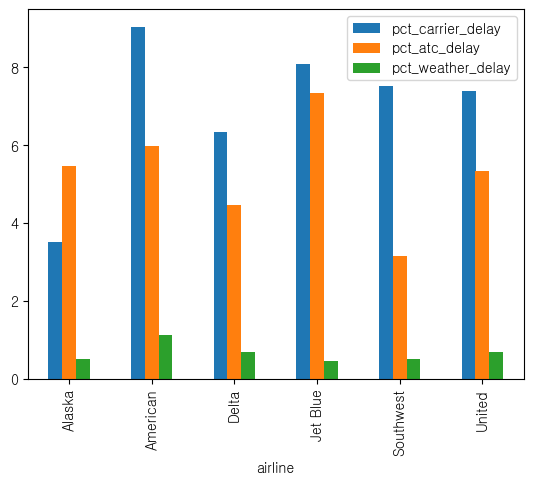

In [64]:
air_df.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().plot(kind='bar')

도수분포표

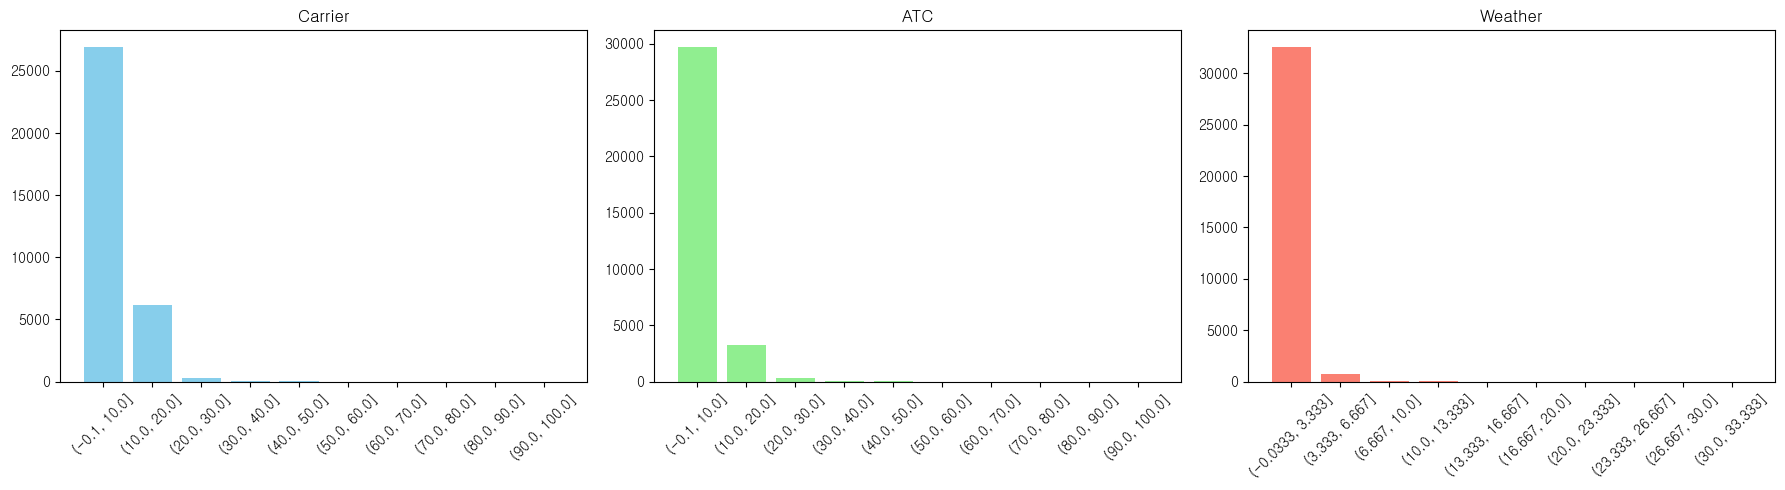

In [ ]:
carrier = pd.cut(air_df['pct_carrier_delay'], bins=10).value_counts().sort_index()
atc = pd.cut(air_df['pct_atc_delay'], bins=10).value_counts().sort_index()
weather = pd.cut(air_df['pct_weather_delay'], bins=10).value_counts().sort_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# carrier
axes[0].bar(carrier.index.astype(str), carrier.values, color='skyblue')
axes[0].set_title('Carrier')
axes[0].tick_params(axis='x', rotation=45)

# atc
axes[1].bar(atc.index.astype(str), atc.values, color='lightgreen')
axes[1].set_title('ATC')
axes[1].tick_params(axis='x', rotation=45)

# weather
axes[2].bar(weather.index.astype(str), weather.values, color='salmon')
axes[2].set_title('Weather')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [65]:
pd.cut(air_df['pct_carrier_delay'], bins=10).value_counts().sort_index()
# 0~10% : 26919
# 10~20% : 6129
# 20% 초과 : 매우 드뭄 전체의 1% 정도
# 90~100% 지연률인 케이스도 5건 존재

pct_carrier_delay
(-0.1, 10.0]     26919
(10.0, 20.0]      6129
(20.0, 30.0]       325
(30.0, 40.0]        43
(40.0, 50.0]        14
(50.0, 60.0]         1
(60.0, 70.0]         2
(70.0, 80.0]         1
(80.0, 90.0]         1
(90.0, 100.0]        5
Name: count, dtype: int64

In [66]:
pd.cut(air_df['pct_atc_delay'], bins=10).value_counts().sort_index()
# 0~10% : 29717
# 10~20% : 3276
# 20% 초과 : 전체의 1.5% 정도
# 90~100% : 6건  극단값도 존재

pct_atc_delay
(-0.1, 10.0]     29717
(10.0, 20.0]      3276
(20.0, 30.0]       349
(30.0, 40.0]        71
(40.0, 50.0]        14
(50.0, 60.0]         7
(60.0, 70.0]         0
(70.0, 80.0]         0
(80.0, 90.0]         0
(90.0, 100.0]        6
Name: count, dtype: int64

In [67]:
pd.cut(air_df['pct_weather_delay'], bins=10).value_counts().sort_index()
# 0~3.3% : 32548 (거의 전부)
# 3.3~10% : 800건 정도
# 10% 이상 : 거의 없음
# 날씨로 인한 지연은 대부분 없다

pct_weather_delay
(-0.0333, 3.333]    32548
(3.333, 6.667]        786
(6.667, 10.0]          76
(10.0, 13.333]         21
(13.333, 16.667]        3
(16.667, 20.0]          2
(20.0, 23.333]          1
(23.333, 26.667]        2
(26.667, 30.0]          0
(30.0, 33.333]          1
Name: count, dtype: int64

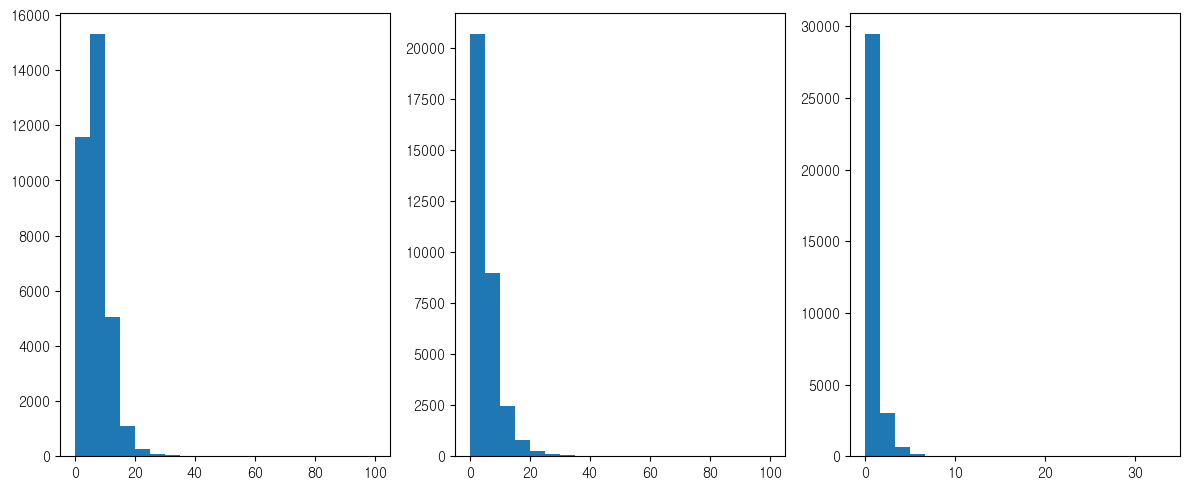

In [68]:
fig = plt.figure(figsize=(12, 5))
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.hist(data=air_df, x='pct_carrier_delay', bins=20)
axes2.hist(data=air_df, x='pct_atc_delay', bins=20)
axes3.hist(data=air_df, x='pct_weather_delay', bins=20)

plt.tight_layout()
plt.show()

In [69]:
# pct_carrier_delay (항공사 자체 지연률)
# 0~10% 구간에 매우 집중

# pct_atc_delay (관제탑 지연률)
# 자체 지연률보다 더 좁게 몰려 있음
# 0~5% 사이가 압도적

# pct_weather_delay (날씨)
# 완전 왼쪽에 몰림 0~3%가 대부분

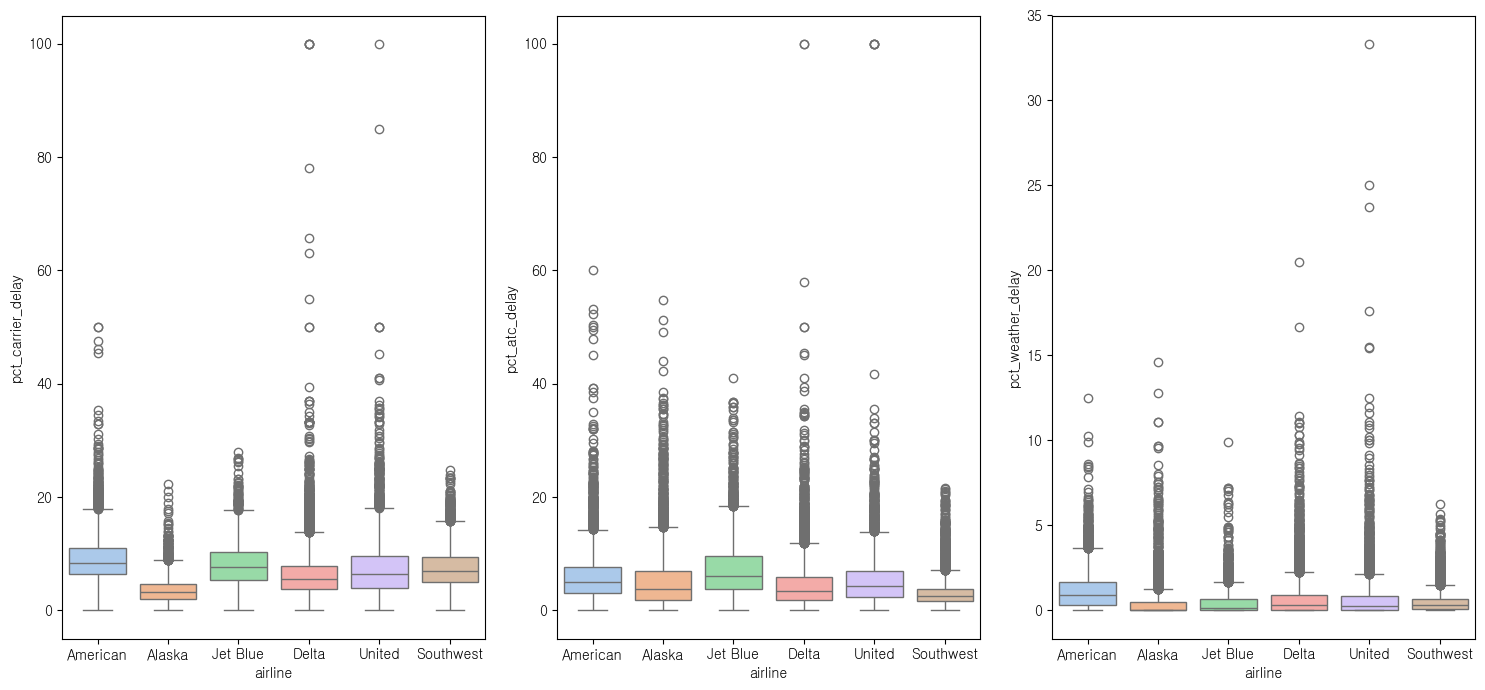

In [70]:
fig = plt.figure(figsize=(15, 7))
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

sns.boxplot(data=air_df, x='airline', y='pct_carrier_delay', palette='pastel', ax=axes1)
sns.boxplot(data=air_df, x='airline', y='pct_atc_delay', palette='pastel', ax=axes2)
sns.boxplot(data=air_df, x='airline', y='pct_weather_delay', palette='pastel', ax=axes3)

plt.tight_layout()
plt.show()

In [71]:
# pct_carrier_delay: 항공사 자체 문제
# American과 Jet Blue는 지연이 상대적으로 많음
# Alaska는 중앙값이 제일 낮고 박스도 낮게 위치 -> 지연이 적고 안정적

# pct_atc_delay: 관제 시스템 지연
# Jet Blue가 관제 지연에서 평균적으로 가장 높은 편
# Southwest는 중앙값이 낮고 이상치 범위도 낮아 보여서 관제 시스템 영향을 적게 받는 항공사로 보임

# pct_weather_delay: 기상 지연
# 모든 항공사에서 기상 지연의 중앙값이 낮음
# United는 이상치가 상대적으로 많이 차이남

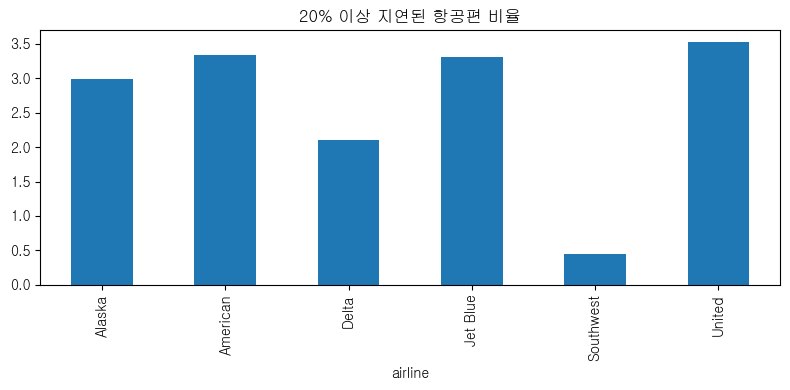

In [72]:
air_delay_df = air_df[
    (air_df['pct_carrier_delay'] >= 20) | (air_df['pct_atc_delay'] >= 20) | (air_df['pct_weather_delay'] >= 20)
]

air_delay_counts = air_delay_df['airline'].value_counts().sort_index()
total_counts = air_df['airline'].value_counts().sort_index()
air_delay_rate = (air_delay_counts / total_counts * 100)

df = pd.DataFrame({
    'total_counts': total_counts,
    'air_delay': air_delay_counts,
    'air_delay_rate(%)': air_delay_rate
})

df['air_delay_rate(%)'].plot(kind='bar', figsize=(8,4), title='20% 이상 지연된 항공편 비율')
plt.tight_layout()
plt.show()

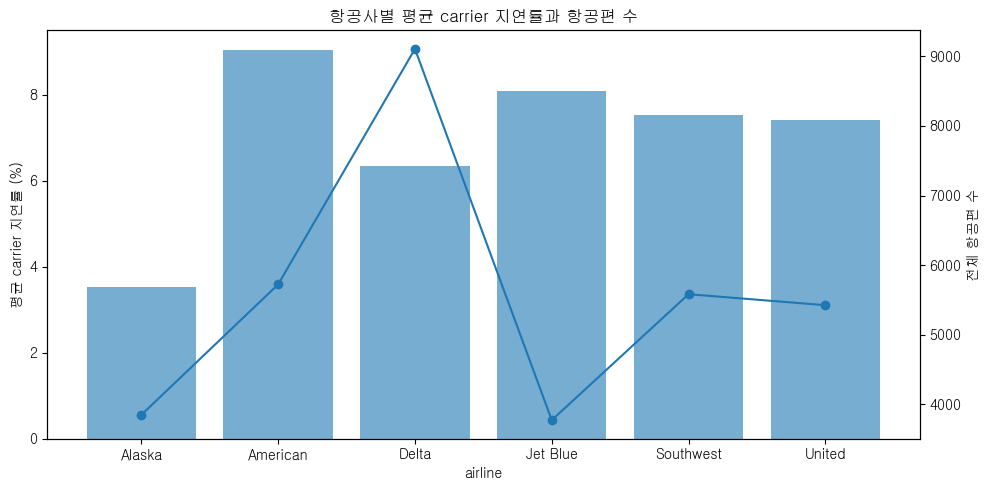

In [ ]:
# 항공사별 평균 지연률 + 건수
grouped_df = air_df.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()
grouped_df['total_flights'] = air_df['airline'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('airline')
ax1.set_ylabel('평균 carrier 지연률 (%)')
ax1.bar(grouped_df.index, grouped_df['pct_carrier_delay'], alpha=0.6)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('전체 항공편 수')
ax2.plot(grouped_df.index, grouped_df['total_flights'], marker='o')
ax2.tick_params(axis='y')

plt.title('항공사별 평균 carrier 지연률과 항공편 수')
plt.tight_layout()
plt.show()

# American : 지연율도 높고 운항량도 많음
# Delta : 항공편 수는 가장 많지만 평균 지연률은 오히려 중간 이하
# Jet Blue : 지연률은 높지만 전체 운항 수는 가장 낮음 ???
# Alaska : 지연률도 낮고 운항 수도 적음

In [73]:
# 전체적 분포
# Southwest: 세 가지 지연 유형 모두에서 분산이 작고 중앙값이 낮음 -> 안정적 운항
# United, Jet Blue, American: carrier/atc delay 이상치가 많고 IQR이 큼
# -> Delta는 중간 정도?

# 20% 이상 지연
# Southwest: 1% 이하
# United, Jet Blue, American: 3% 이상
# Delta 상대적으로는 안정적